In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot, zscore
from statsmodels.graphics.gofplots import qqplot
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pingouin as pg

In [ ]:
# Para google colab

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Regressão Linear Simples

### Carga dos dados

In [4]:
df_pontuacao = pd.read_csv(r'C:\Users\PC\OneDrive\Imagens\Saved Pictures\CDM\PROGRAMAÇÃO\PYTHON\modelo-regressao\modelo-regressao-linear-com-api\data\raw\pontuacao_teste.csv')

In [5]:
# Checar estrutura do DF

df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
# Visualizar topo do DF

df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [7]:
# Visualizar tail do DF

df_pontuacao.tail()

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [8]:
# Medidas estastísticas das variáveis

df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

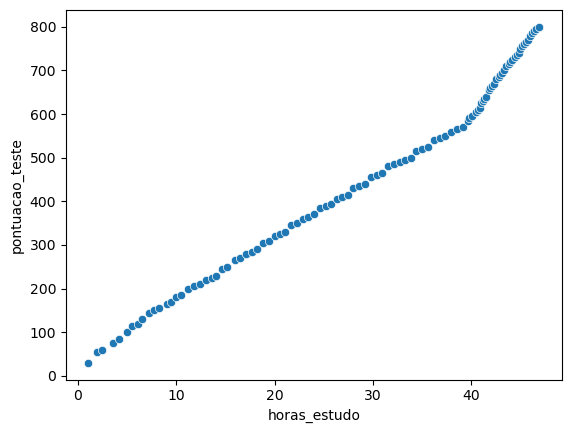

In [9]:
# Plot de Dispersão
# X = horas_estudo
# y = pontuacao_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

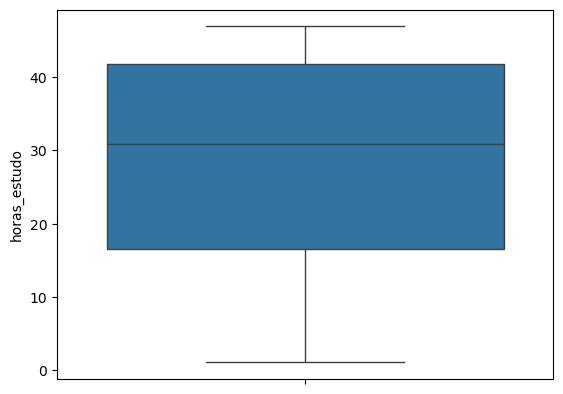

In [10]:
# Verificar se temos outliers
#Plot Boxplot

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

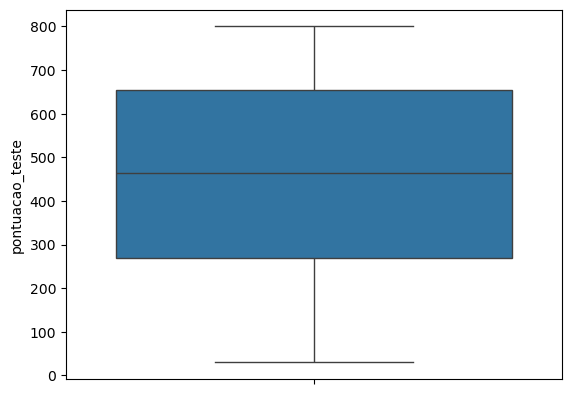

In [11]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

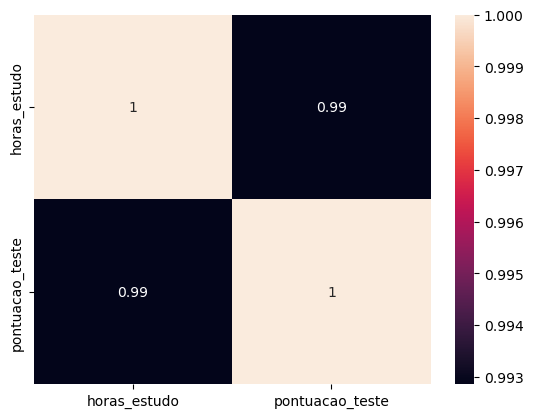

In [12]:
# Verificar Correlação - Pearson

sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

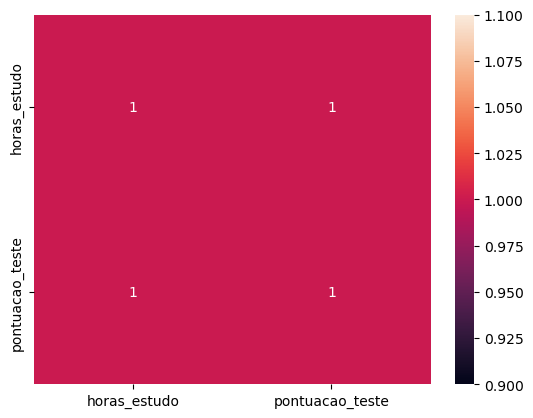

In [13]:
# Verificar Correlação - Spearman

sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

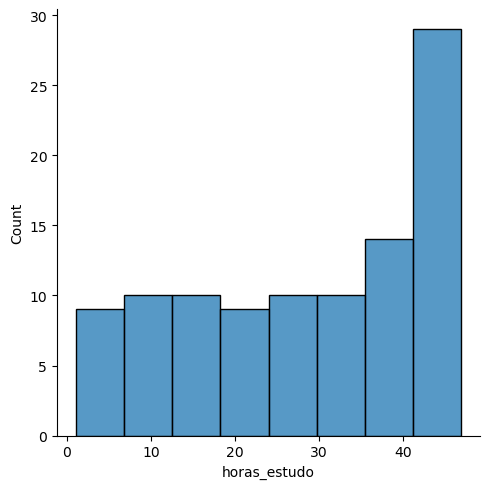

In [14]:
# Histograma das variáveis -

sns.displot(df_pontuacao, x='horas_estudo')

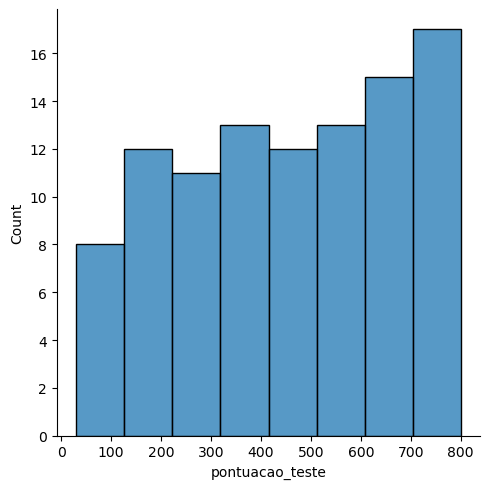

In [15]:
# Histograma das variáveis

sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo

In [16]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [18]:
# Instanciar o modelo a ser treinado e treinar o modelo em seguida

reg_model = LinearRegression().fit(X_train, y_train)

In [19]:
# Imprimir a equação da reta
# y = aX + b

print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0],
reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validação do Modelo - Métricas
- Comprovação de boas previsões

In [20]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)

In [21]:
# Calcular métricas R-Squared ou Coeficiente de Determinação
# R2-Score representa a proporção na variação na variável dependente que é explicada
# pela variável dependente

r2_score(y_test, y_pred)

0.9828400452912442

In [22]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y test - y pred) <- Média do valor absoluto dos valores de y_test
# Ele é uma métrica fácil de interpretar
# MAE é menos sensivel a outliers

mean_absolute_error(y_test, y_pred)

22.957470277134608

In [23]:
# Calcular métria MSE (Mean Squared Error)
# MSE = media (ytest - ypred)2
# Não é bem interpretável
# MAE é mais sensível a outliers e penaliza grandes erros

mean_squared_error(y_test, y_pred)

766.9972992416427

In [24]:
# Calcular métria RMSE (Square Root Mean Squared Error)
# MSE = Raiz (media (ytest - ypred)2)
# É uma métrica fácil de interpretar
# RMSE é mais sensivel a outliers e penaliza grandes erros

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

27.69471608884342


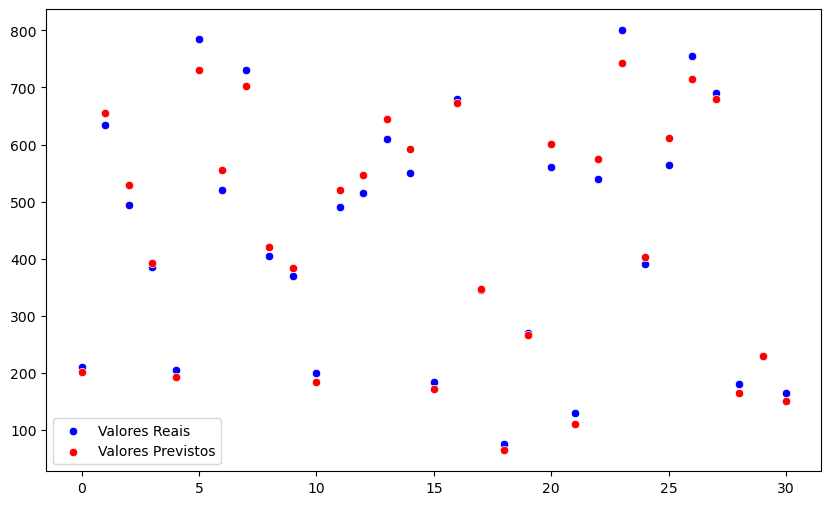

In [25]:
# Análise Gráfica

x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y= y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y= y_pred.reshape(-1), color='red', label='Valores Previstos')
plt.legend()
plt.show()

### Análise de Resíduos

In [26]:
# Calcular os resíduos

residuos = y_test - y_pred

In [27]:
# Calcular os resíduos padronizados (standardzation)
# Para cada elemento de um conjunto (X - media / desvio_padrao)

residuos_std = zscore(residuos)

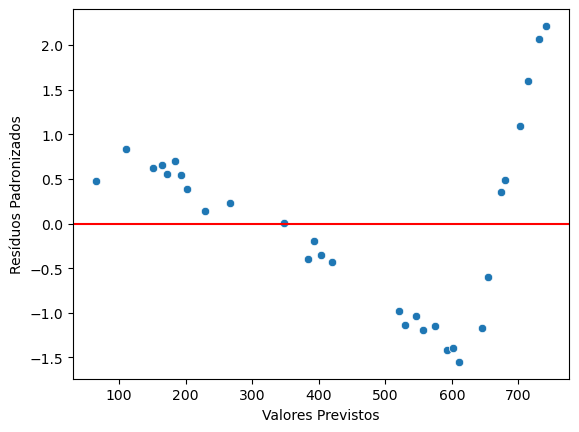

In [28]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Se os valores estiverem em torno da reta, temos homocedasticidade, caso contrário
# se tivermos alguma tendência ou padrão (formam um cone, funil), há
# heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0, color='red')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos Padronizados')
plt.show()

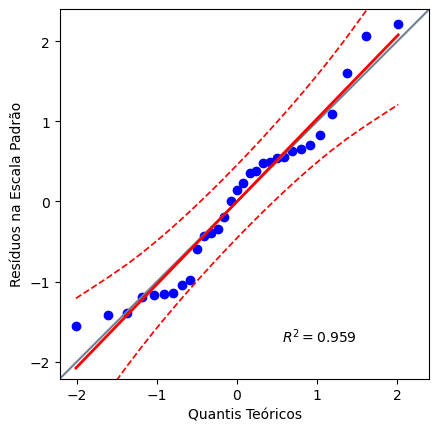

In [29]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile- Quantile) Plot, que avalia se uma amostra segue uma distribuição
# normal

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()

### Teste de Normalidade de Resíduos

In [30]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Os dados parecem seguir uma distribuição normal
# H1 - Não segue distribuição normal
# Se o p-value > 0.05 não rejeita H0, caso contrário rejeitamos.

stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))
print("""Estatística do teste: {}
P-value: {}""".format(stat_shapiro, p_value_shapiro))

Estatística do teste: 0.9500532226161753
P-value: 0.15663817850304346


In [31]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Os dados parecem seguir uma distribuição normal
# H1 - Não segue distribuição normal
# Se o p-value > 0.05 não rejeita H0, caso contrário rejeitamos.

stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print("""Estatística do teste: {}
P-value: {}""".format(stat_ks, p_value_ks))

Estatística do teste: 0.48355808450512827
P-value: 3.395368995814077e-07


### Fazer predições com o modelo

In [32]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?


reg_model.predict([[30.4]])

array([[484.01220436]])

In [33]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = ax + b
# y - b = ax
# (y - b) / a = x

x = (600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]
x

37.81485802710669

### Salvar modelo para usar depois

In [34]:
import joblib

joblib.dump(reg_model, './trained_model.pkl')

['./trained_model.pkl']